# PREDICTING CUSTOMER CHURN

## Installing and importing required libraries

In [1]:
#pip install --user pandas_profiling==2.8.0

In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [3]:
df = pd.read_csv("Dataset\Telecom_customer churn.csv")

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics)

## Explanatory data analysis

#### The goal of EDA will to check for accuracy, missing values, duplicate rows, structural errors, outliers, imbalance, and correlation 

Run pandas profile report

Using minimal+True as the dataset is very large

In [5]:
#r = ProfileReport(df)
#r.to_file(output_file="Google Drive\EDUCATION\ONLINE\Sharpestminds\Project\Report.html")
ProfileReport(df, minimal=True)

### Calculate the percentage of missing values in each column

In [6]:
missing_per = round((df.isna().sum()/len(df))*100,2)

#Sort the values from largest to smallest and display top 50 rows
pd.DataFrame(missing_per).sort_values(by=0, ascending=False).head(50)

0
numbcars          49.37
dwllsize          38.31
HHstatin          37.92
ownrent           33.71
dwlltype          31.91
lor               30.19
income            25.44
adults            23.02
infobase          22.08
hnd_webcap        10.19
prizm_social_one   7.39
avg6rev            2.84
avg6mou            2.84
avg6qty            2.84
ethnic             1.73
rv                 1.73
marital            1.73
forgntvl           1.73
kid0_2             1.73
kid3_5             1.73
kid6_10            1.73
kid16_17           1.73
creditcd           1.73
truck              1.73
kid11_15           1.73
change_rev         0.89
change_mou         0.89
hnd_price          0.85
mou_Mean           0.36
rev_Mean           0.36
da_Mean            0.36
roam_Mean          0.36
datovr_Mean        0.36
totmrc_Mean        0.36
vceovr_Mean        0.36
ovrrev_Mean        0.36
ovrmou_Mean        0.36
area               0.04
avgqty             0.00
totrev             0.00
adjrev             0.00
adjmou             0.00
adjqty             0.00
avgrev             0.00
avgmou             0.00
totcalls           0.00
avg3mou            0.00
avg3qty            0.00
avg3rev            0.00
eqpdays            0.00

OBSERVATION

Following columns have large amount of missing values.Hence will be deleted
1. numbcars-49.37%
2. dwllsize-38.31%
3. HHstatin-37.92%
4. ownrent -33.71%
5. dwlltype-31.91%
6. lor	   -30.19%
7. income  -25.44%
8. adults  -23.02%
9. infobase-22.08%
10. hnd_webcap-10.19%
11. prizm_social_one-7.39%

Folowing features have low missing rates.Hence, the represtive rows with missing value shall be deleted

1. avg6rev	    2.84%
2. avg6mou	    2.84%
3. avg6qty	    2.84%
4. ethnic	    1.73%
1. rv	        1.73%
6. marital	    1.73%
7. forgntvl     1.73%
8. kid0_2	    1.73%
9. kid3_5	    1.73%
10. kid6_10	    1.73%
12. kid16_17    1.73%
13. creditcd    1.73%
14. truck	    1.73%
15. kid11_15    1.73%
16. change_rev 	0.89%
17. change_mou	0.89%
18. hnd_price	0.85%
19. mou_Mean	0.36%
20. rev_Mean	0.36%
21. da_Mean	    0.36%
22. roam_Mean	0.36%
23. datovr_Mean	0.36%
24. totmrc_Mean	0.36%
25. vceovr_Mean	0.36%
26. ovrrev_Mean	0.36%
27. ovrmou_Mean	0.36%
28. area	    0.04%

#### Plotting correlation matrix and heatmap

In [7]:
pd.options.display.float_format = '{:,.3f}'.format #Displays number upto 3 decimals only
pd.set_option('display.max_columns', None)
df.corr()

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  \
rev_Mean        1.000     0.706        0.602    0.404        0.772   
mou_Mean        0.706     1.000        0.576    0.395        0.576   
totmrc_Mean     0.602     0.576        1.000    0.307        0.201   
da_Mean         0.404     0.395        0.307    1.000        0.305   
ovrmou_Mean     0.772     0.576        0.201    0.305        1.000   
...               ...       ...          ...      ...          ...   
income         -0.041    -0.094       -0.026    0.032       -0.030   
numbcars        0.002     0.013        0.004   -0.001       -0.000   
forgntvl       -0.038    -0.051       -0.035   -0.021       -0.027   
eqpdays        -0.213    -0.315       -0.248   -0.121       -0.128   
Customer_ID     0.010     0.097        0.061    0.000        0.010   

             ovrrev_Mean  vceovr_Mean  datovr_Mean  roam_Mean  change_mou  \
rev_Mean           0.777        0.772        0.153      0.375       0.076   
mou_Mean           0.541        0.540        0.090      0.125      -0.008   
totmrc_Mean        0.164        0.163        0.035      0.047      -0.021   
da_Mean            0.274        0.274        0.040      0.045      -0.022   
ovrmou_Mean        0.956        0.953        0.163      0.040      -0.011   
...                  ...          ...          ...        ...         ...   
income            -0.039       -0.038       -0.016     -0.009      -0.008   
numbcars          -0.000        0.000       -0.004     -0.005       0.001   
forgntvl          -0.028       -0.028       -0.002     -0.005       0.005   
eqpdays           -0.136       -0.132       -0.053     -0.022      -0.007   
Customer_ID        0.034        0.032        0.024      0.001      -0.007   

             change_rev  drop_vce_Mean  drop_dat_Mean  blck_vce_Mean  \
rev_Mean          0.151          0.423          0.057          0.221   
mou_Mean          0.019          0.594          0.053          0.319   
totmrc_Mean      -0.023          0.350          0.037          0.180   
da_Mean          -0.017          0.262          0.024          0.137   
ovrmou_Mean      -0.004          0.343          0.043          0.183   
...                 ...            ...            ...            ...   
income           -0.009         -0.059         -0.004         -0.058   
numbcars          0.000          0.010         -0.008          0.007   
forgntvl          0.004         -0.033         -0.000         -0.028   
eqpdays           0.002         -0.217         -0.029         -0.132   
Customer_ID       0.004          0.068          0.010          0.043   

             blck_dat_Mean  unan_vce_Mean  unan_dat_Mean  plcd_vce_Mean  \
rev_Mean             0.019          0.436          0.056          0.579   
mou_Mean             0.020          0.645          0.061          0.823   
totmrc_Mean          0.011          0.359          0.042          0.491   
da_Mean              0.008          0.301          0.019          0.405   
ovrmou_Mean          0.017          0.364          0.049          0.482   
...                    ...            ...            ...            ...   
income              -0.010         -0.117         -0.013         -0.091   
numbcars            -0.003          0.010         -0.005          0.018   
forgntvl            -0.003         -0.048         -0.006         -0.051   
eqpdays             -0.015         -0.243         -0.038         -0.285   
Customer_ID          0.010          0.090          0.019          0.072   

             plcd_dat_Mean  recv_vce_Mean  recv_sms_Mean  comp_vce_Mean  \
rev_Mean             0.117          0.488          0.017          0.591   
mou_Mean             0.124          0.696          0.014          0.831   
totmrc_Mean          0.088          0.413          0.024          0.506   
da_Mean              0.050          0.269          0.006          0.416   
ovrmou_Mean          0.093          0.417          0.003          0.492   
...                    ...     

<AxesSubplot:>

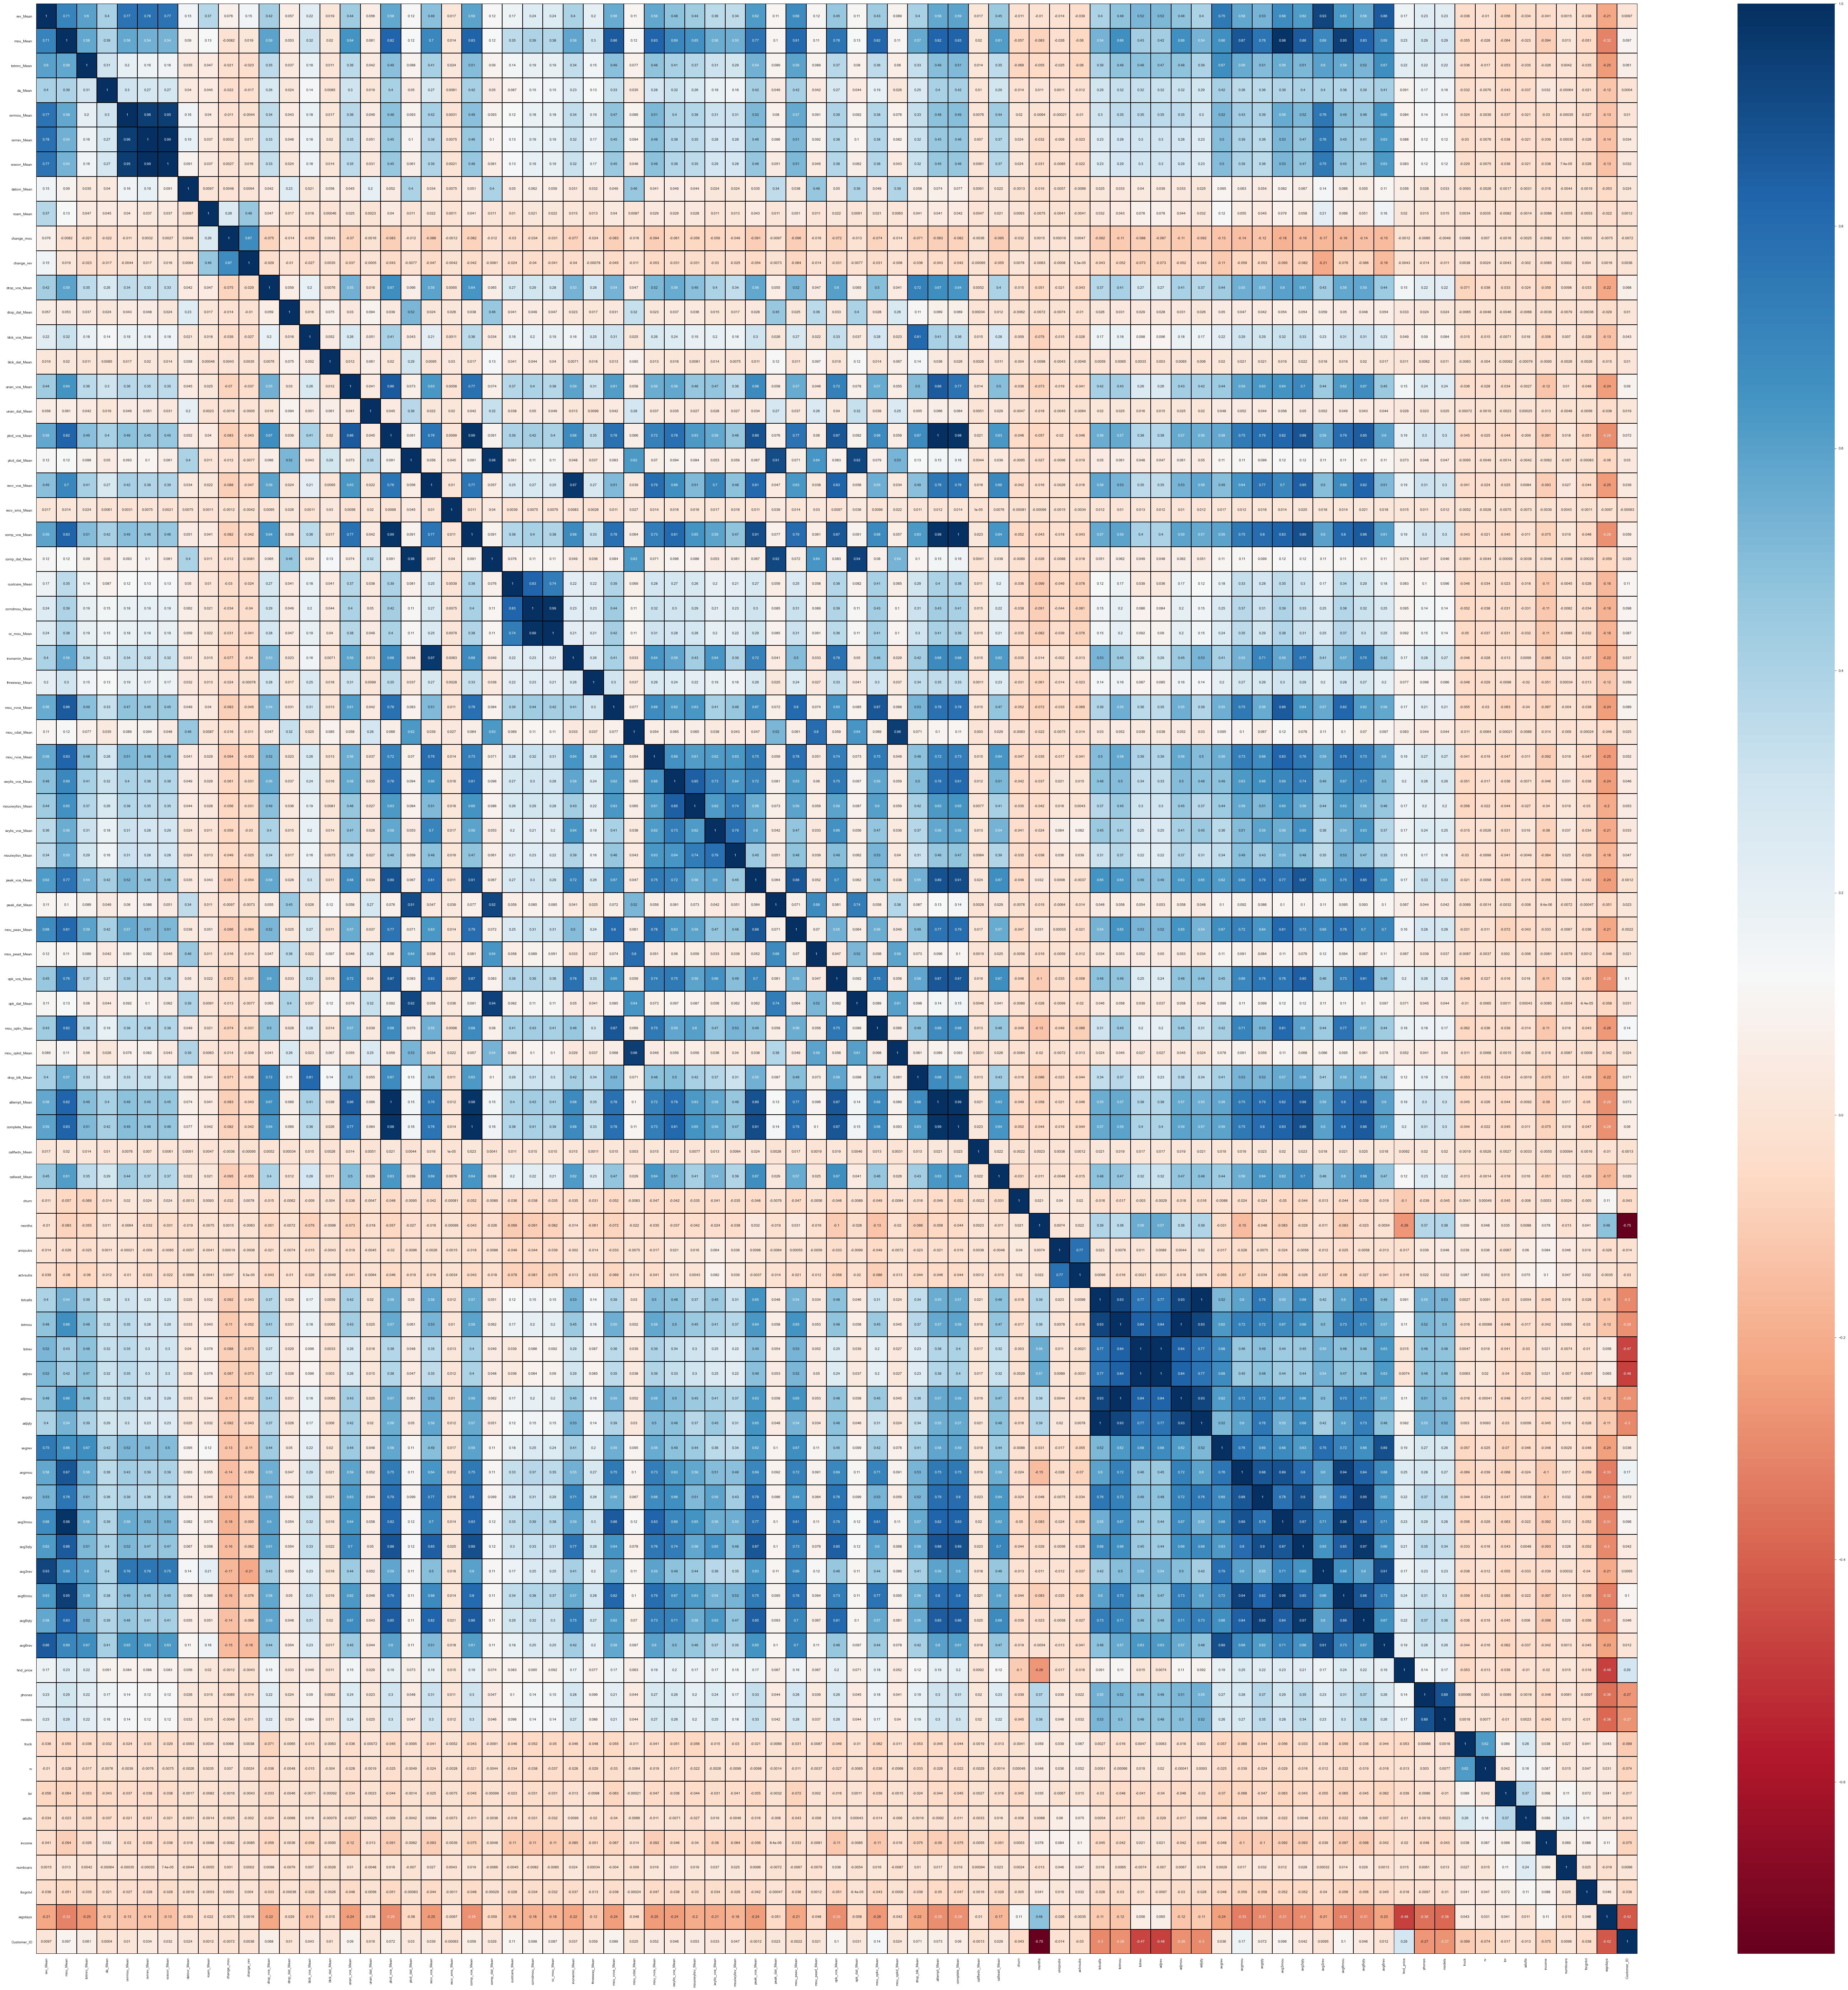

In [8]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(),annot=True,cmap='RdBu', linecolor='black', linewidths=1)

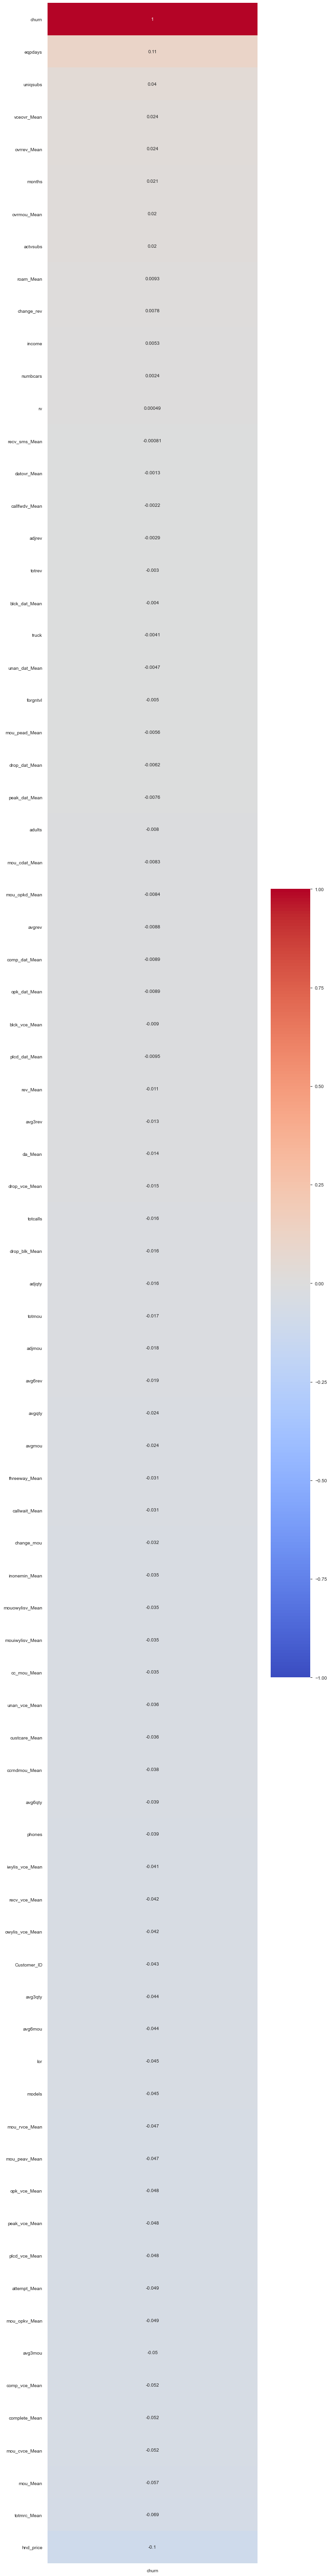

In [9]:
#Checking correlation between churn and other variables

subjective_corr = df.corr()

plt.figure(figsize=(10,100))
sns.heatmap(subjective_corr[['churn']].sort_values(by=['churn'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

### Observations from scatter plot in Weka and heatmap

The scatter plots were visualized in Weka and found Churn is not linearly correlated to any other feature. However, there are several features that are linearly correlated with each other and they could be reduced by principal component analysis

In [10]:
#Finding pairs of feature that are highly correlated with each other

high_corr = df.corr().unstack().sort_values().drop_duplicates()
hc = pd.DataFrame(high_corr)
hc[hc[0]>0.9].sort_index()


0
adjmou        totmou        1.000
adjqty        adjmou        0.926
              totmou        0.926
adjrev        totrev        0.998
attempt_Mean  plcd_vce_Mean 0.998
avg3mou       avg6mou       0.962
avg3qty       avg6qty       0.968
avg3rev       avg6rev       0.913
avg6qty       avgqty        0.947
avgmou        avg6mou       0.941
avgqty        avg3qty       0.902
cc_mou_Mean   ccrndmou_Mean 0.989
comp_dat_Mean plcd_dat_Mean 0.981
comp_vce_Mean attempt_Mean  0.984
              peak_vce_Mean 0.910
complete_Mean attempt_Mean  0.986
              comp_vce_Mean 0.998
              peak_vce_Mean 0.907
inonemin_Mean recv_vce_Mean 0.967
mou_Mean      avg3mou       0.981
              avg6mou       0.945
mou_opkd_Mean mou_cdat_Mean 0.958
opk_dat_Mean  comp_dat_Mean 0.941
              plcd_dat_Mean 0.922
ovrrev_Mean   ovrmou_Mean   0.956
              vceovr_Mean   0.995
peak_dat_Mean comp_dat_Mean 0.922
              plcd_dat_Mean 0.907
plcd_vce_Mean comp_vce_Mean 0.985
              complete_Mean 0.983
rev_Mean      avg3rev       0.927
              rev_Mean      1.000
totcalls      adjmou        0.925
              adjqty        1.000
              totmou        0.926
vceovr_Mean   ovrmou_Mean   0.953

The features in above dataframe are highly correlated and hence can be reduced using PCA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

#### Checking for Outliers

In [12]:
pd.set_option('display.max_columns', None)
df.describe(percentiles=[.05, .25, .50, .75, .95])

rev_Mean   mou_Mean  totmrc_Mean    da_Mean  ovrmou_Mean  ovrrev_Mean  \
count 99,643.000 99,643.000   99,643.000 99,643.000   99,643.000   99,643.000   
mean      58.720    513.560       46.179      0.889       41.072       13.560   
std       46.292    525.168       23.623      2.178       97.296       30.501   
min       -6.168      0.000      -26.915      0.000        0.000        0.000   
5%        15.000     17.000       10.000      0.000        0.000        0.000   
25%       33.260    150.750       30.000      0.000        0.000        0.000   
50%       48.195    355.500       44.990      0.247        2.750        1.000   
75%       70.750    703.000       59.990      0.990       42.000       14.438   
95%      135.968  1,547.475       84.990      4.207      195.250       64.899   
max    3,843.262 12,206.750      409.990    159.390    4,320.750    1,102.400   

       vceovr_Mean  datovr_Mean  roam_Mean  change_mou  change_rev  \
count   99,643.000   99,643.000 99,643.000  99,109.000  99,109.000   
mean        13.295        0.261      1.286     -13.934      -1.021   
std         30.056        3.127     14.711     276.088      50.363   
min          0.000        0.000      0.000  -3,875.000  -1,107.740   
5%           0.000        0.000      0.000    -388.150     -48.003   
25%          0.000        0.000      0.000     -87.000      -7.365   
50%          0.682        0.000      0.000      -6.250      -0.315   
75%         14.025        0.000      0.235      63.000       1.643   
95%         64.349        0.585      5.165     346.000      47.392   
max        896.087      423.540  3,685.200  31,219.250   9,963.657   

       drop_vce_Mean  drop_dat_Mean  blck_vce_Mean  blck_dat_Mean  \
count    100,000.000    100,000.000    100,000.000    100,000.000   
mean           5.955          0.041          4.023          0.026   
std            8.955          0.877         10.672          1.490   
min            0.000          0.000          0.000          0.000   
5%             0.000          0.000          0.000          0.000   
25%            0.667          0.000          0.000          0.000   
50%            3.000          0.000          1.000          0.000   
75%            7.667          0.000          3.667          0.000   
95%           21.667          0.000         17.000          0.000   
max          232.667        207.333        385.333        413.333   

       unan_vce_Mean  unan_dat_Mean  plcd_vce_Mean  plcd_dat_Mean  \
count    100,000.000    100,000.000    100,000.000    100,000.000   
mean          27.785          0.030        144.882          0.871   
std           38.359          0.497        158.268          9.054   
min            0.000          0.000          0.000          0.000   
5%             0.000          0.000          0.000          0.000   
25%            5.000          0.000         38.333          0.000   
50%           16.000          0.000        100.333          0.000   
75%           36.000          0.000        198.667          0.000   
95%           96.333          0.000        441.333          1.667   
max          848.667         81.667      2,289.000        733.667   

       recv_vce_Mean  recv_sms_Mean  comp_vce_Mean  comp_dat_Mean  \
count    100,000.000    100,000.000    100,000.000    100,000.000   
mean          55.085          0.048        108.893          0.774   
std           86.841          2.127        118.580          8.130   
min            0.000          0.000          0.000          0.000   
5%             0.000          0.000          0.000          0.000   
25%            5.333          0.000         28.667          0.000   
50%           26.667          0.000         75.667          0.000   
75%           71.333          0.000        149.667          0.000   
95%          200.667          0.000        330.667          1.333   
max        3,369.333        517.333      1,894.333        559.333   

       custcare_Mean  ccrndmou_Mean  cc_mou_Mean  inonemin_Mean  

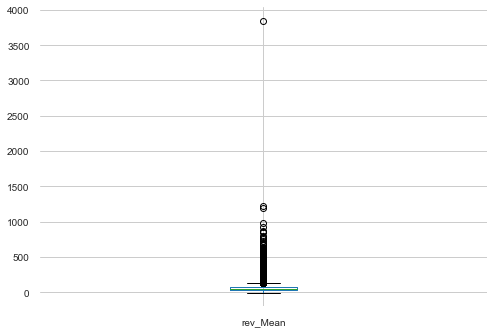

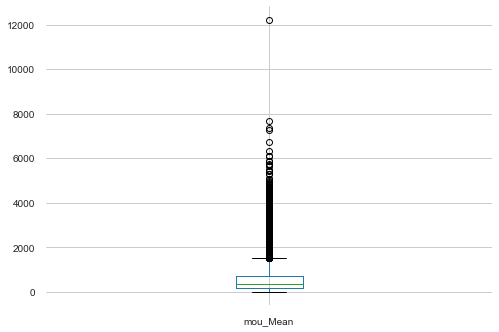

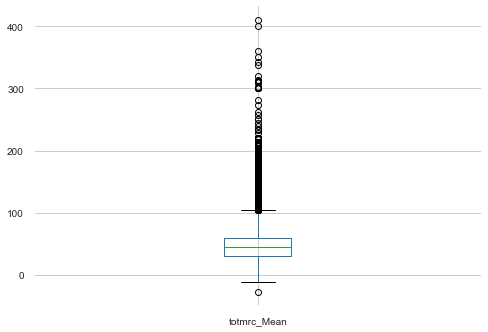

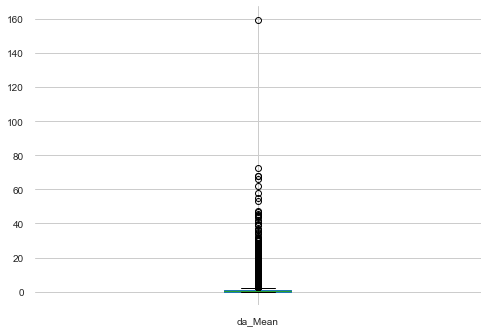

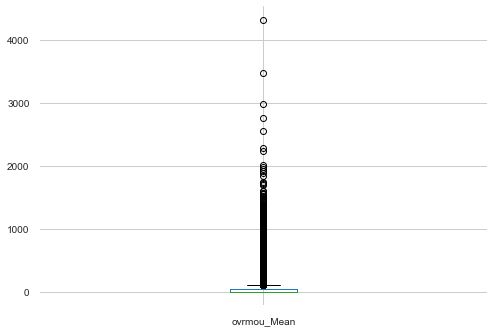

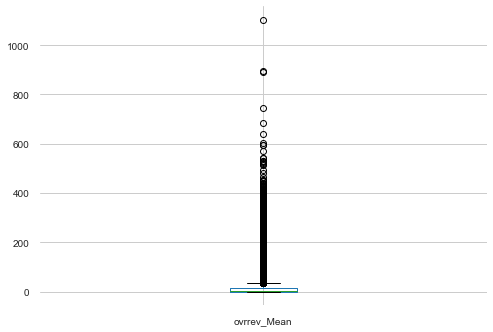

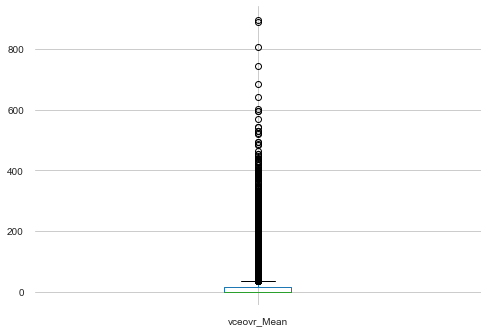

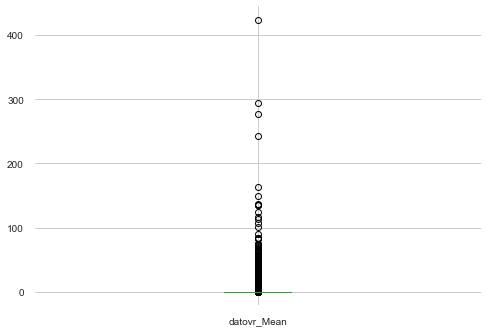

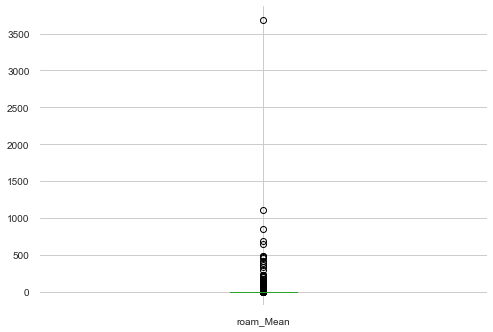

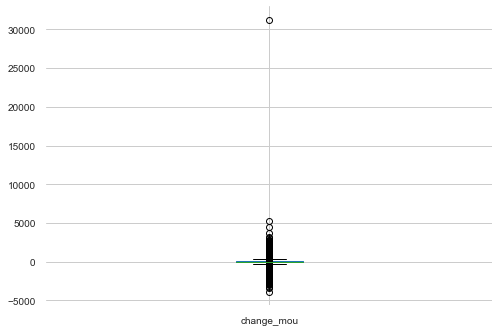

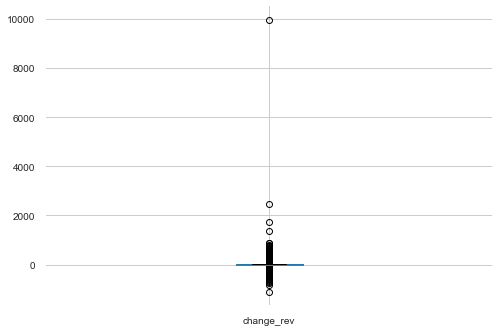

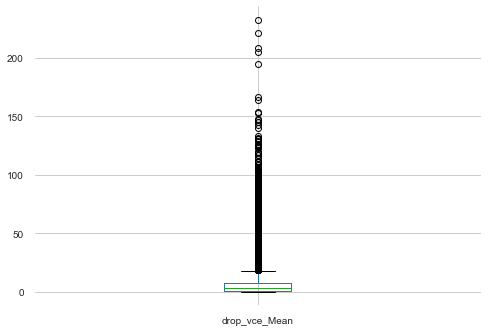

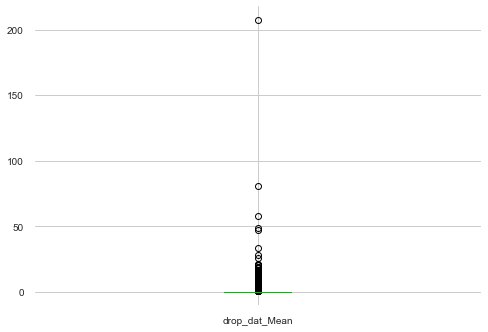

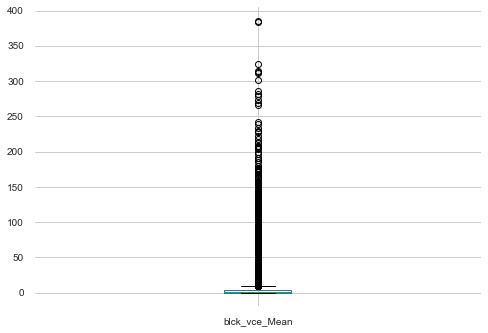

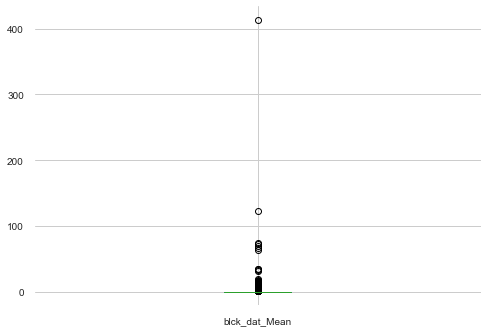

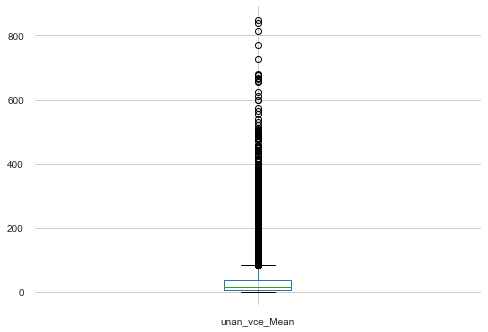

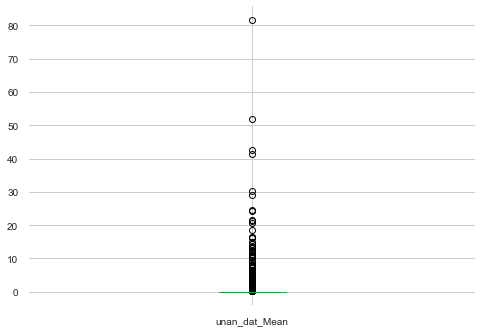

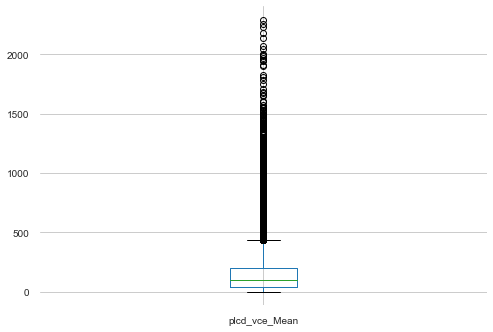

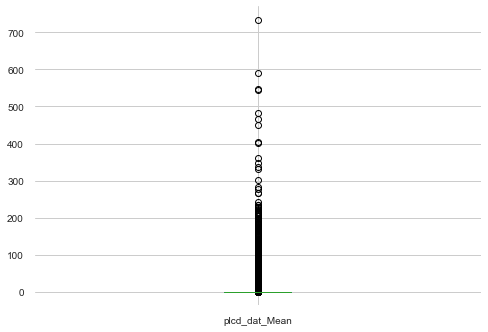

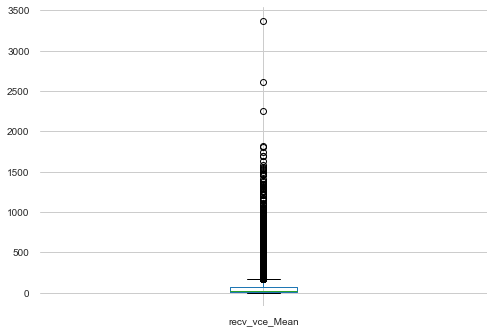

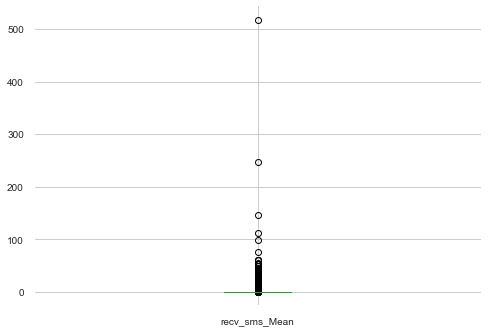

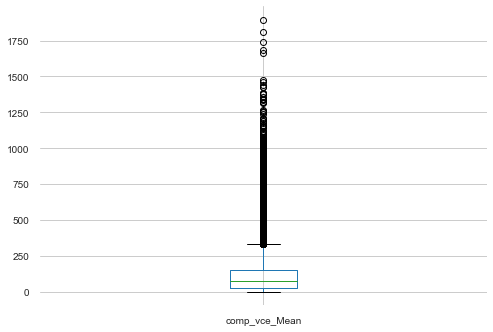

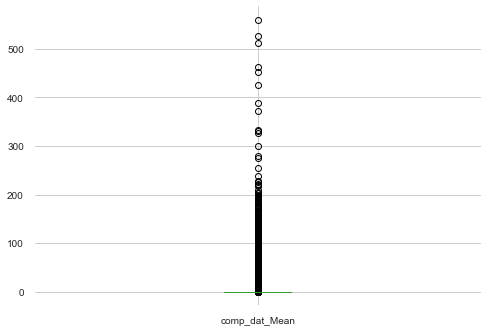

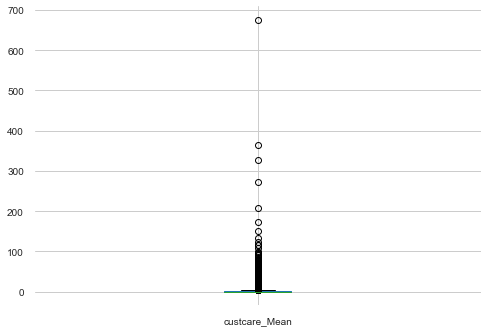

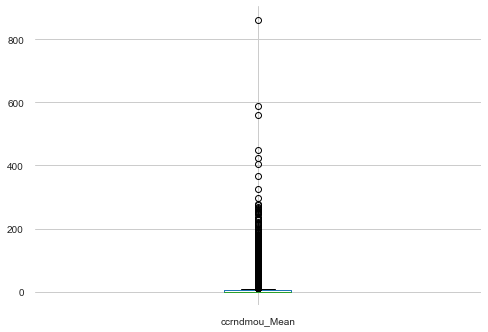

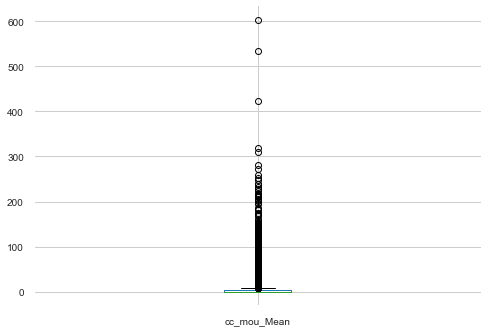

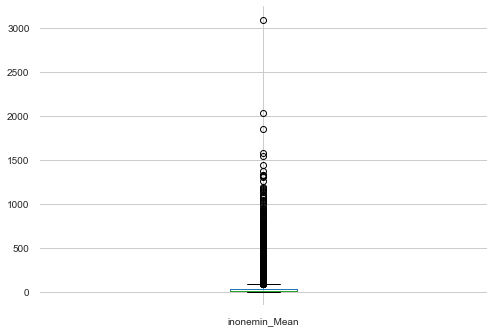

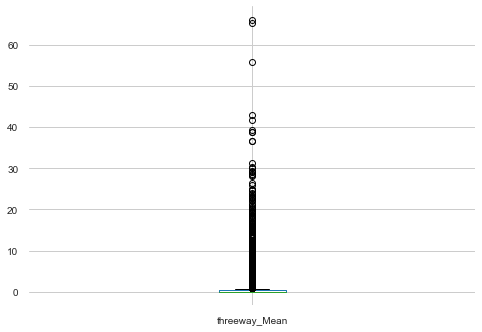

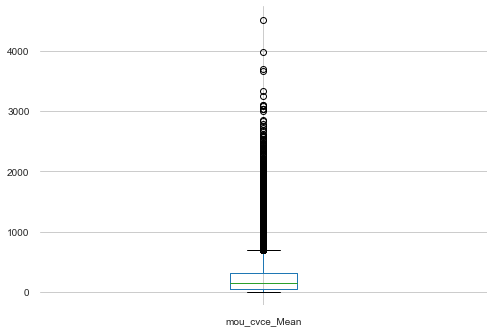

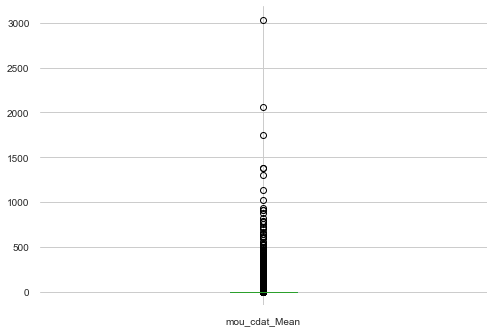

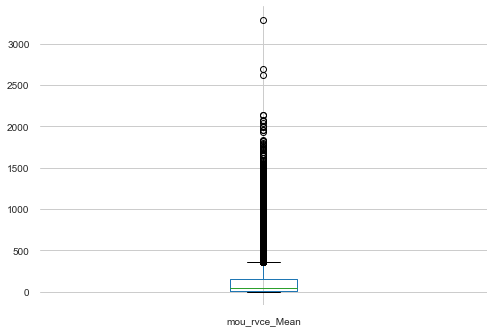

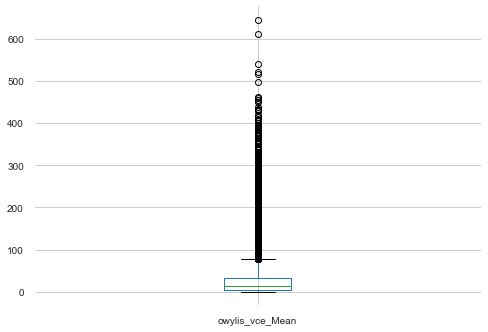

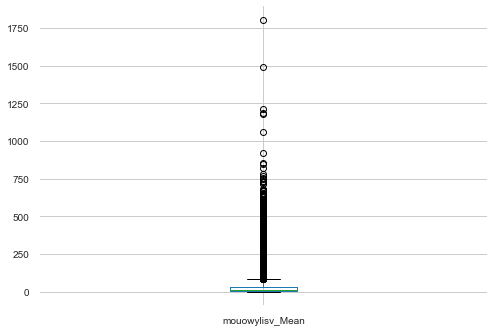

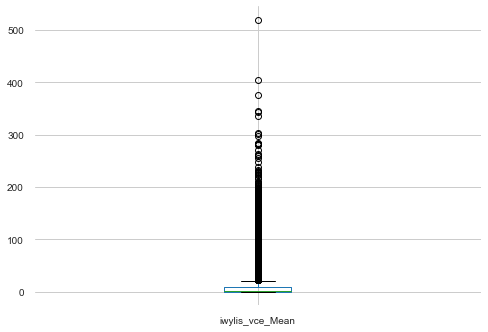

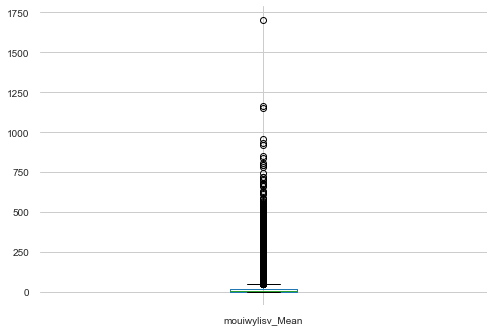

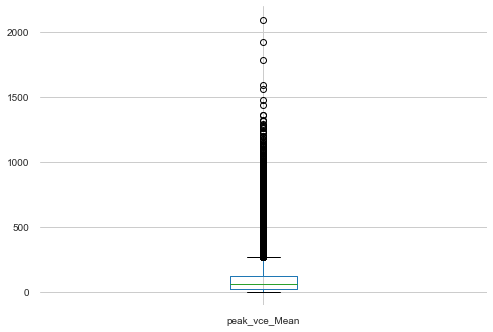

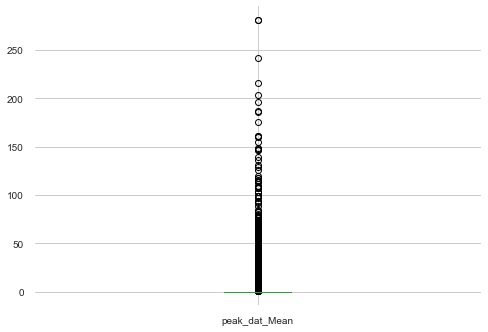

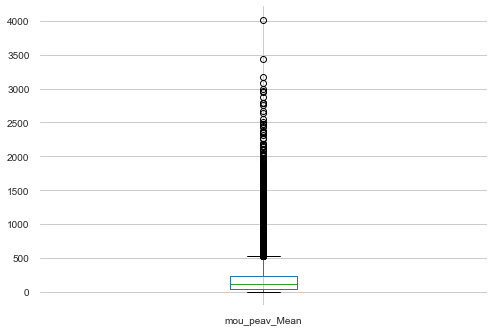

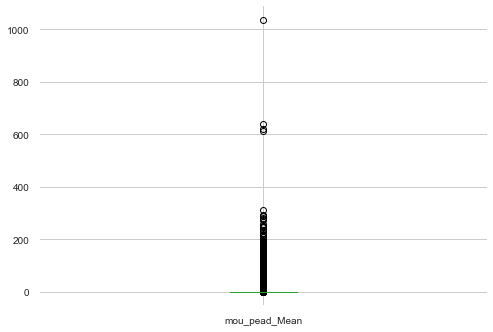

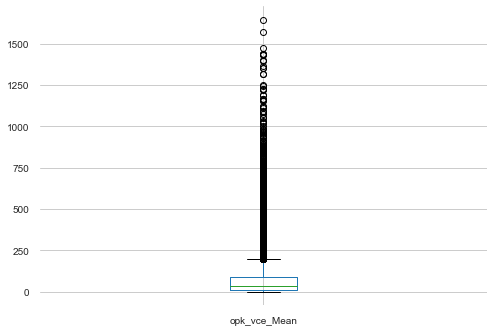

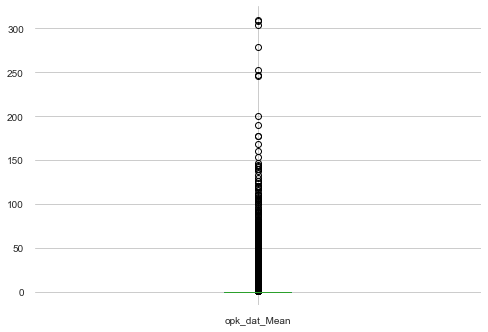

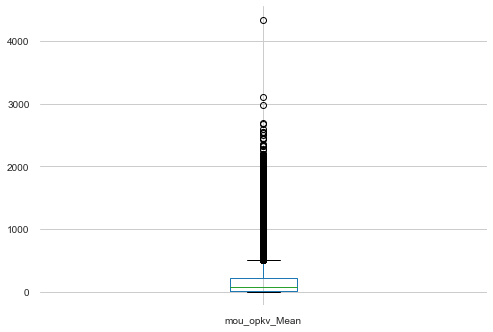

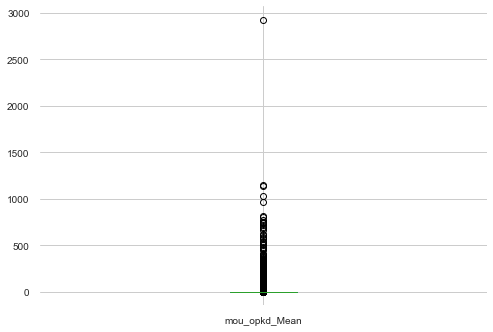

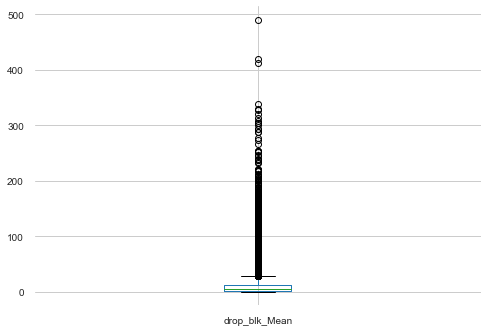

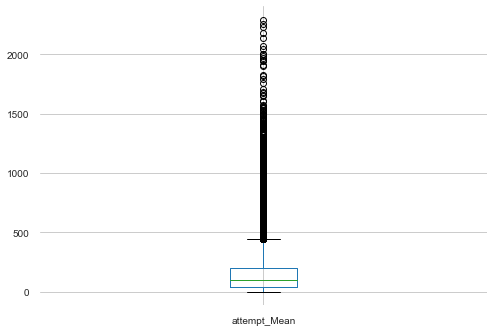

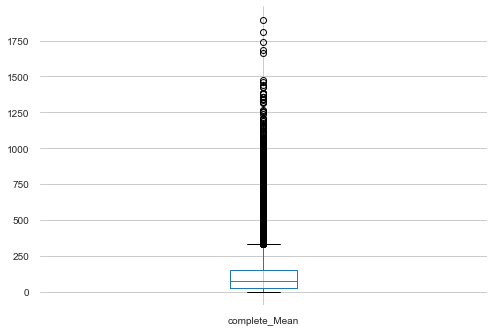

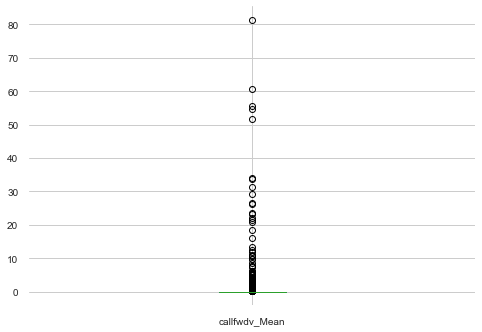

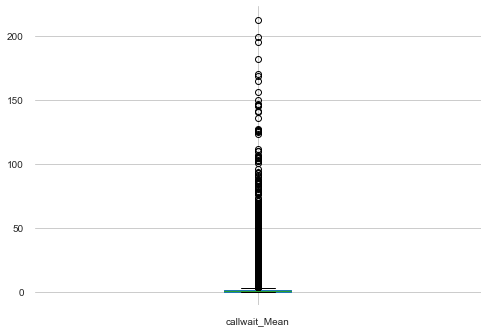

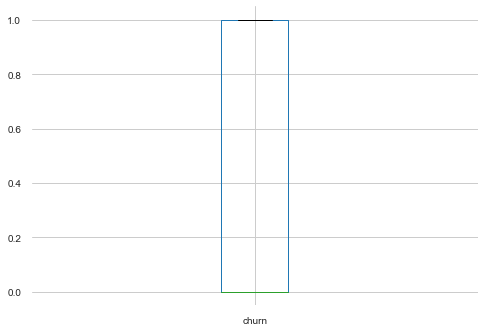

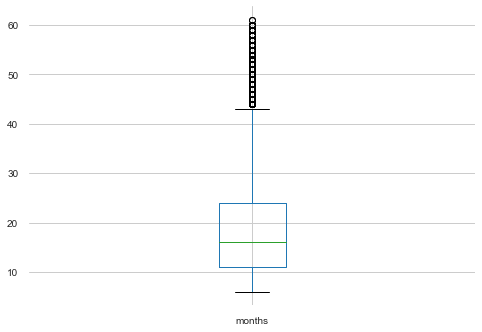

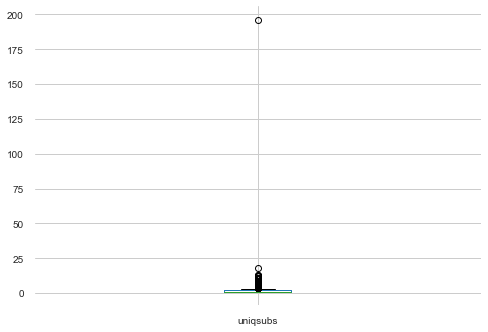

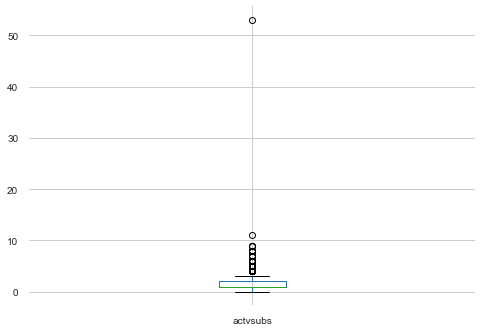

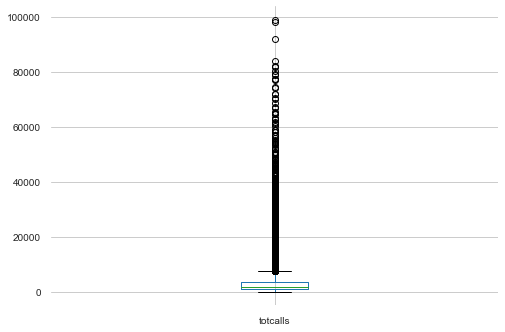

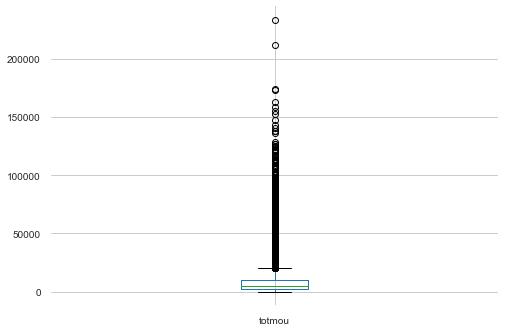

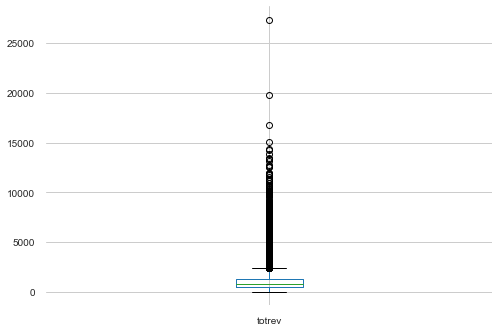

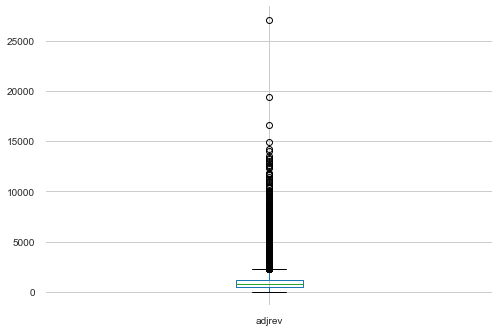

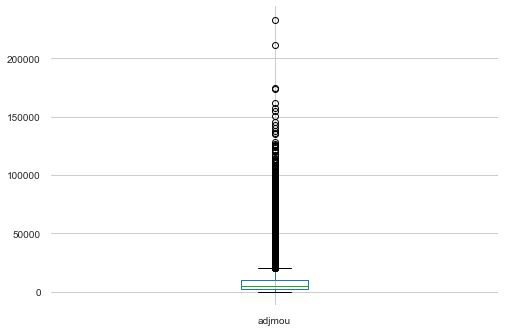

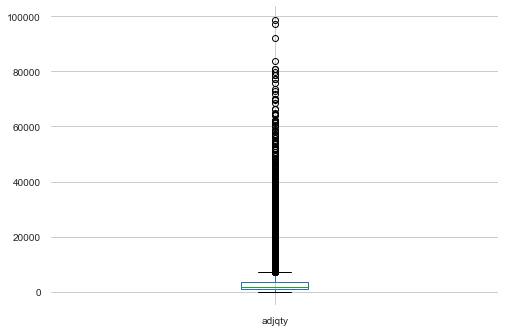

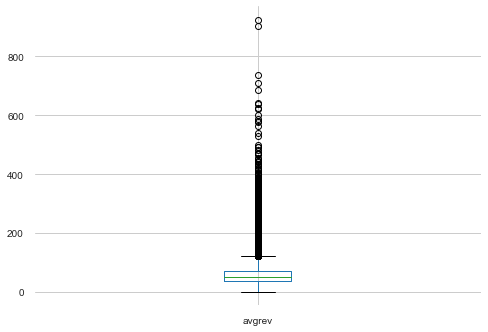

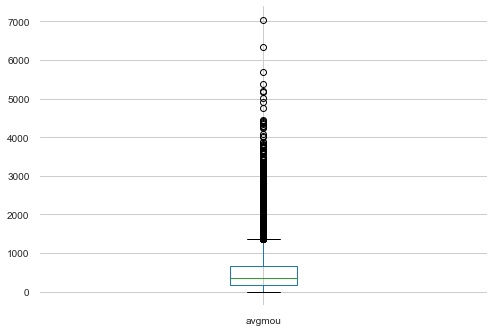

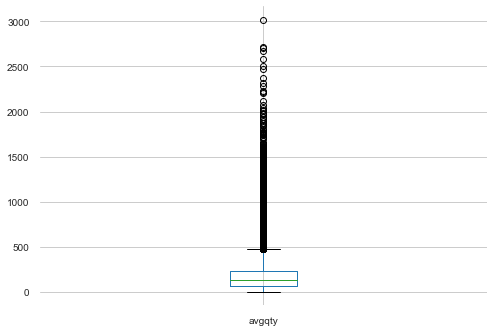

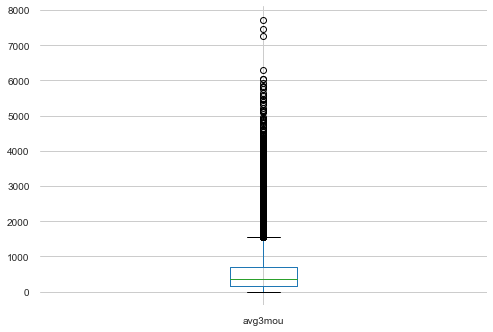

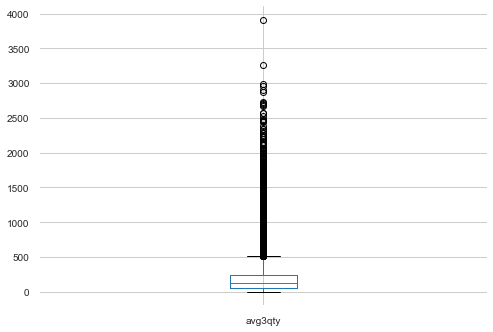

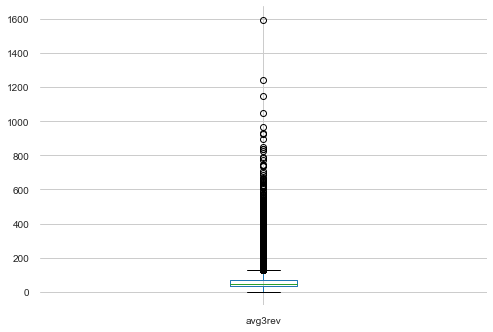

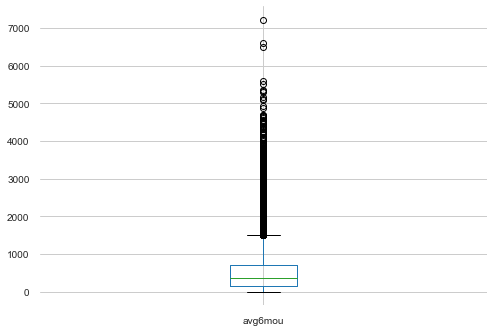

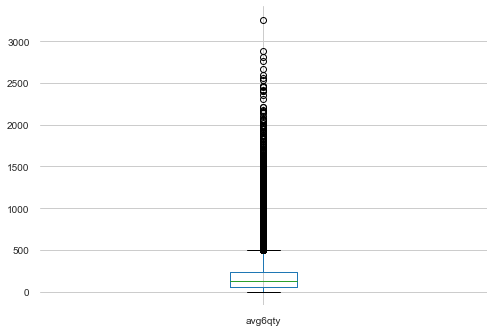

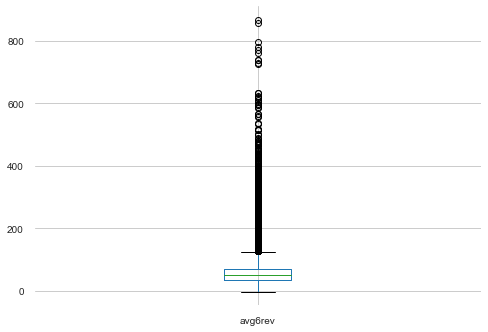

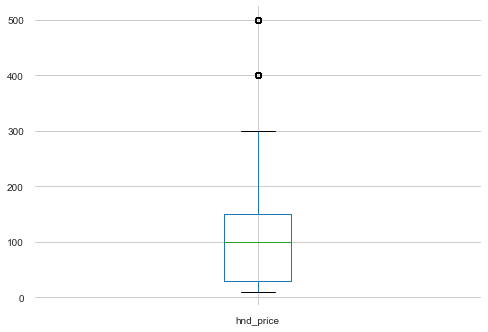

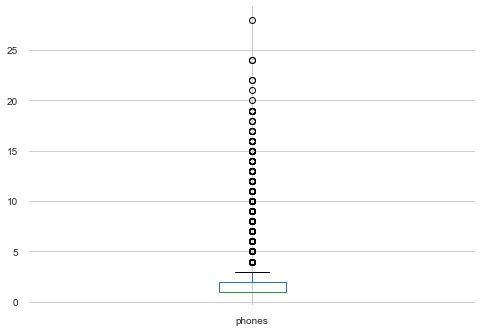

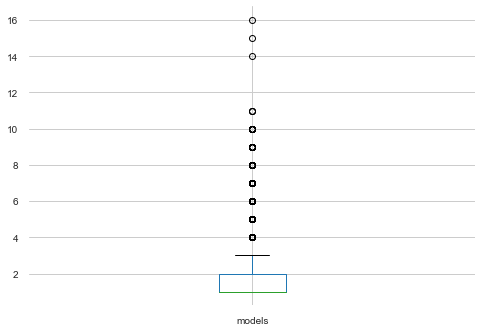

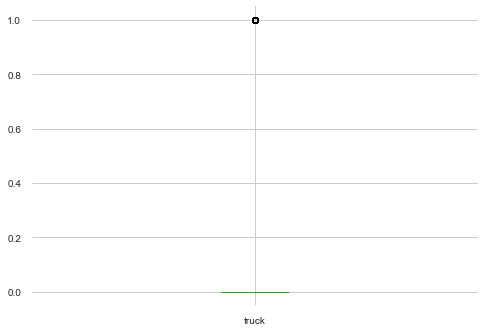

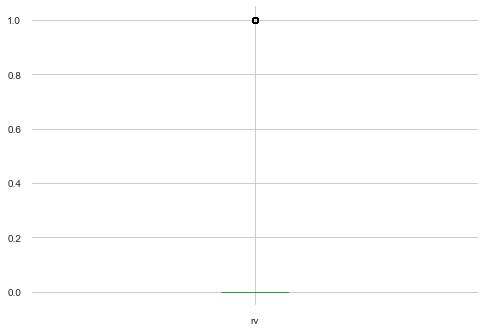

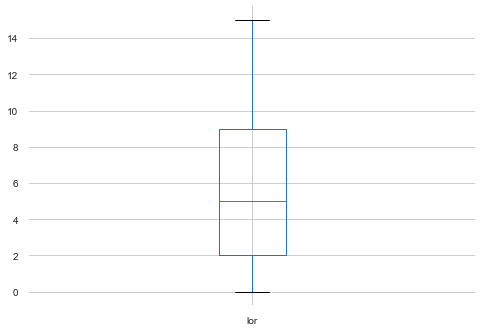

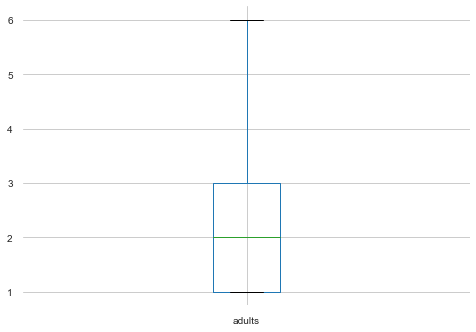

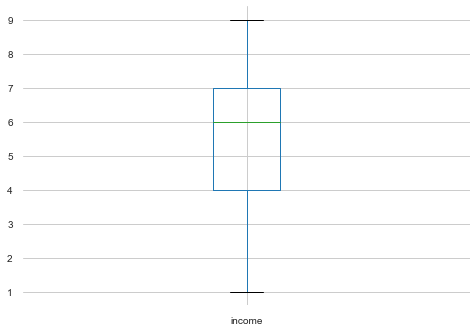

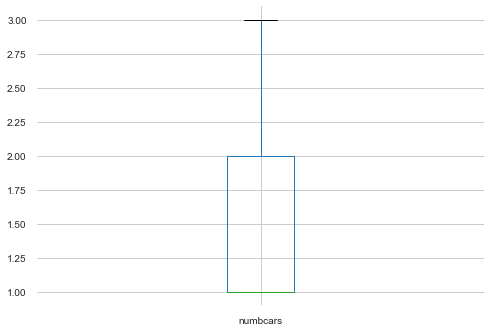

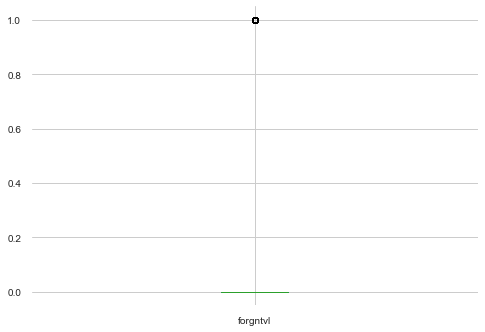

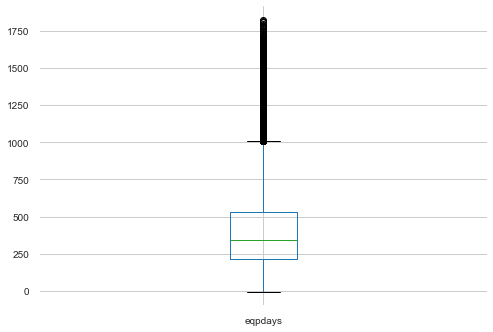

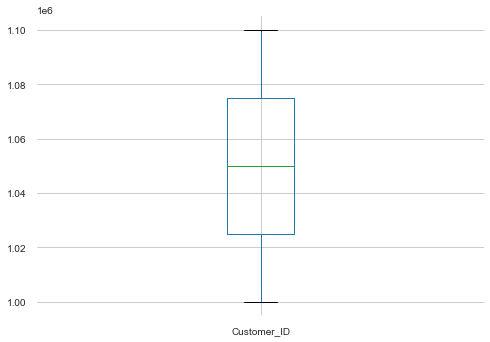

In [13]:
for i, col in enumerate(num_df.columns):
    plt.figure(i)
    df.boxplot(column= [col])

There is huge difference between 95th percentile and maximum value in almost all the numerical features

This suggests that there are large outliers.
Since, the numerical features are closely correlated with each other, suggest that removing the outlier rows would remove outliers from other features too.

#### Analysing zero skewed values

In [14]:
#Counting percentage zero values within the datseta

zeros_count =pd.DataFrame((df == 0).astype(int).sum(axis=0))
zeros_percnt=((zeros_count[0]/len(df))*100)
zeros_percnt.sort_values(0,ascending=False).head(30)

callfwdv_Mean     99.567
recv_sms_Mean     99.128
blck_dat_Mean     98.772
drop_dat_Mean     97.400
unan_dat_Mean     96.880
forgntvl          92.571
mou_pead_Mean     91.060
peak_dat_Mean     91.058
opk_dat_Mean      90.394
mou_opkd_Mean     90.382
rv                90.153
mou_cdat_Mean     86.607
comp_dat_Mean     86.607
datovr_Mean       85.970
plcd_dat_Mean     85.020
truck             79.713
threeway_Mean     73.439
roam_Mean         68.650
cc_mou_Mean       55.692
ccrndmou_Mean     55.692
custcare_Mean     55.692
churn             50.438
callwait_Mean     49.691
da_Mean           48.411
vceovr_Mean       47.135
ovrmou_Mean       42.603
ovrrev_Mean       42.552
mouiwylisv_Mean   30.461
iwylis_vce_Mean   30.461
blck_vce_Mean     27.916
Name: 0, dtype: float64

This data also includes Boolean and categorical values so need to go check indivudally while comparing with pandas profiling data

We can remove the columns which have more than 70% values are zero. Closer analysis reveals that following column can be removed as they are not boolean and have very few distinct values.

callfwdv_Mean, recv_sms_Mean, blck_dat_Mean, drop_dat_Mean, unan_dat_Mean, mou_pead_Mean, peak_dat_Mean, opk_dat_Mean, mou_opkd_Mean, mou_cdat_Mean, comp_dat_Mean, datovr_Mean, plcd_dat_Mean

KeyError: 'new_cell'

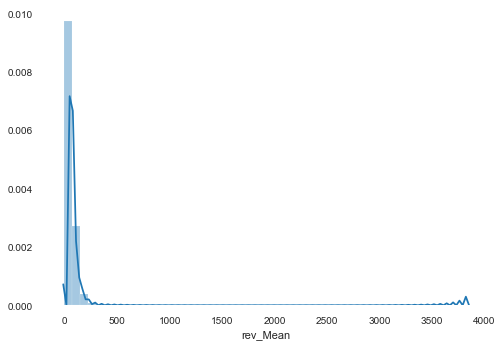

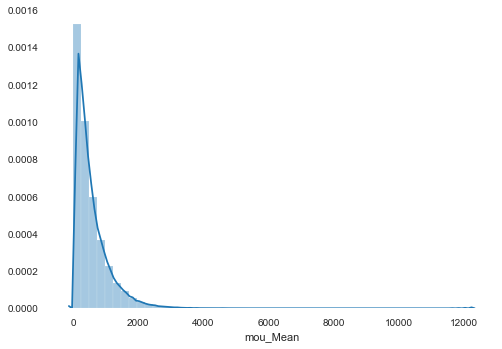

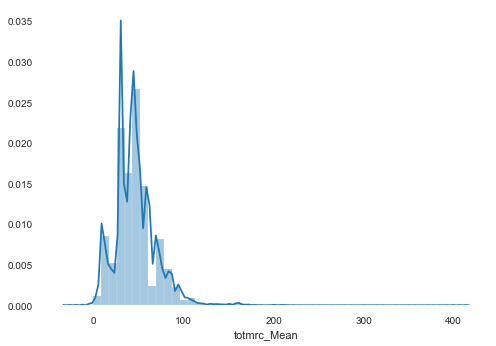

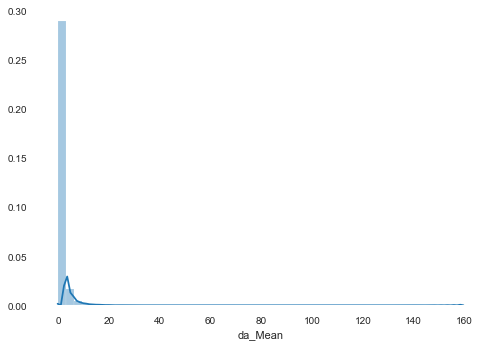

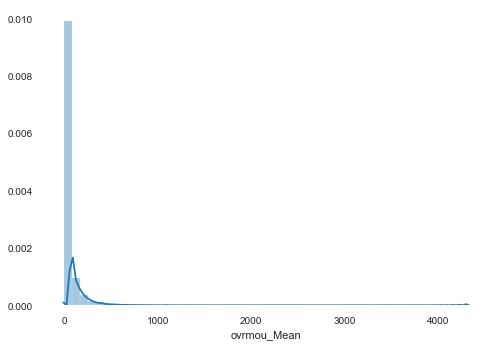

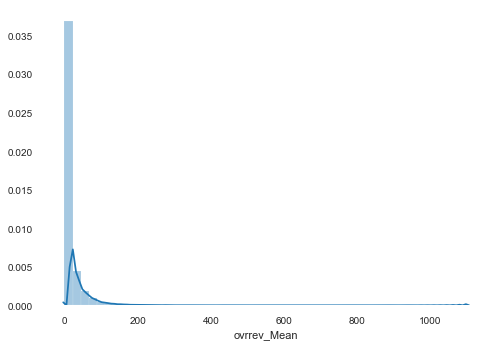

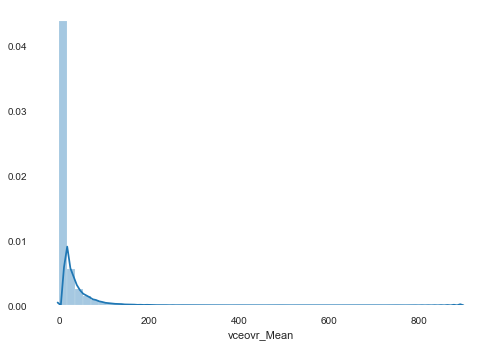

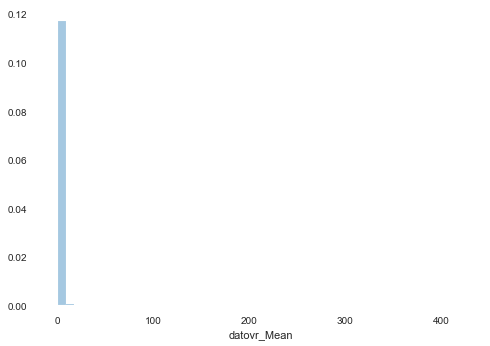

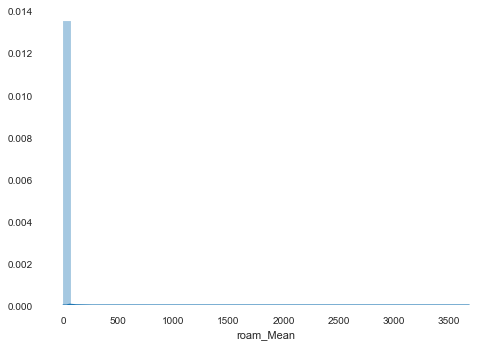

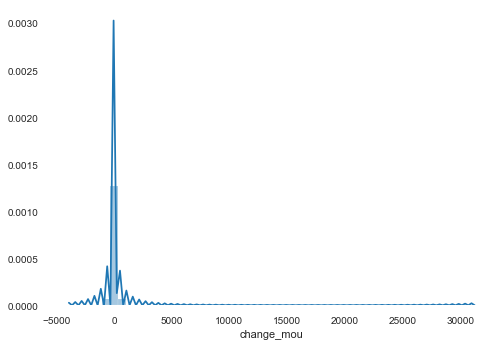

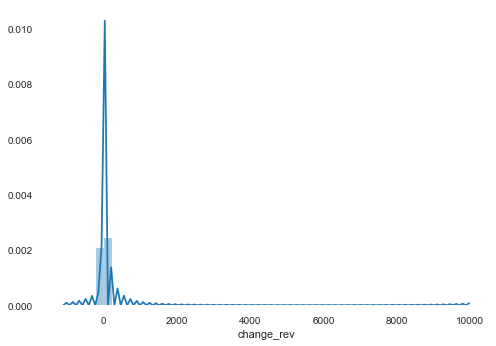

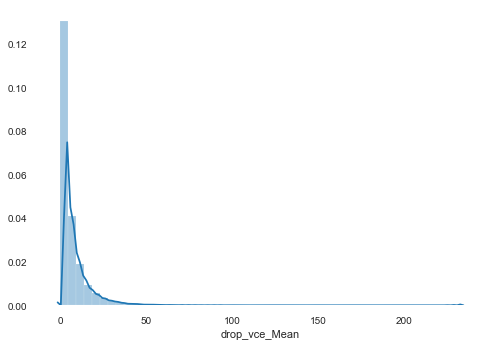

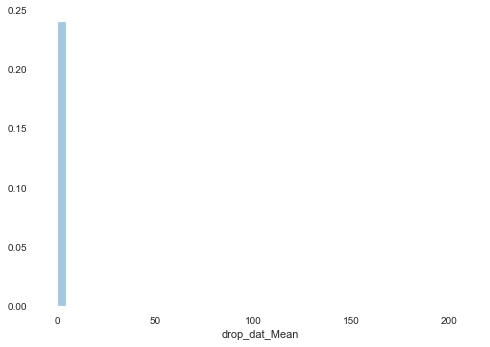

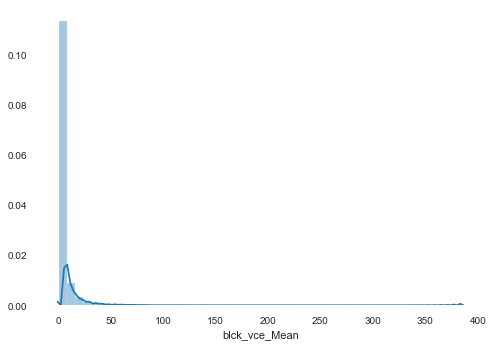

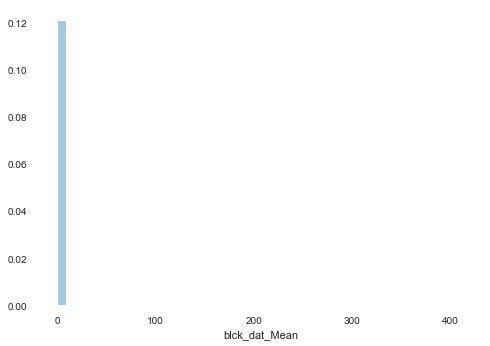

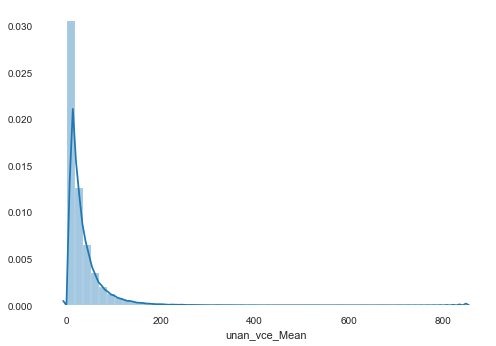

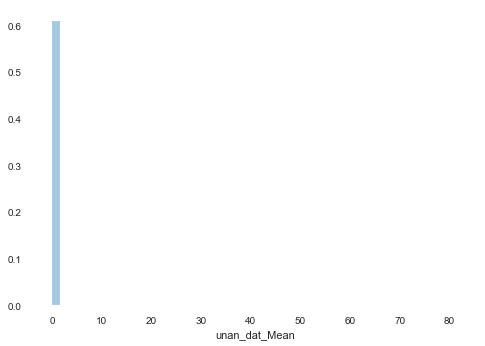

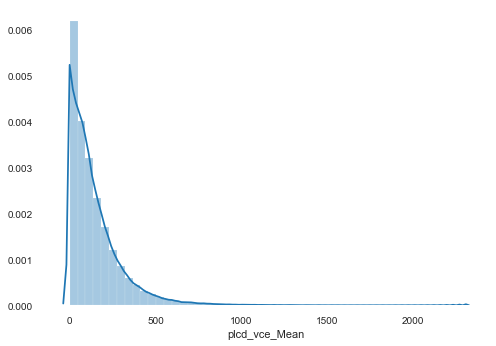

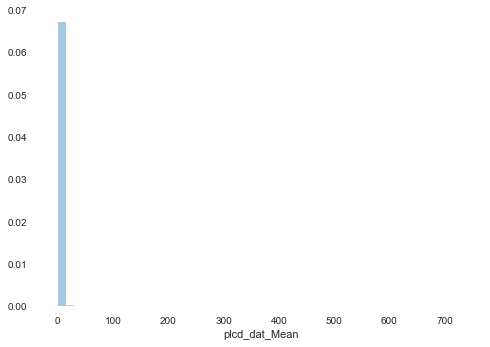

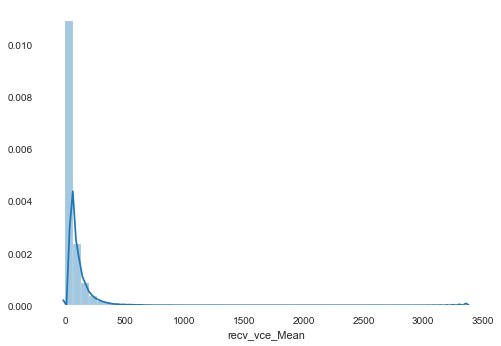

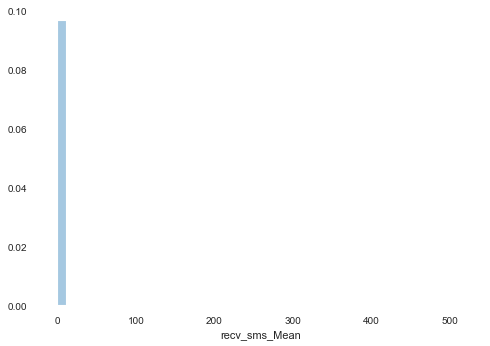

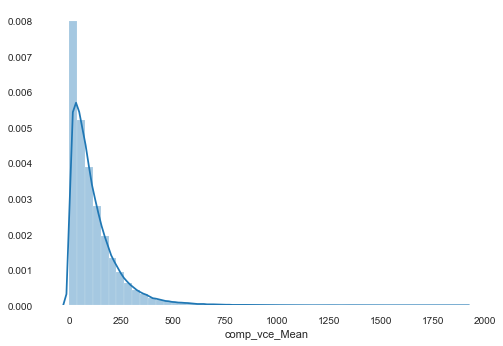

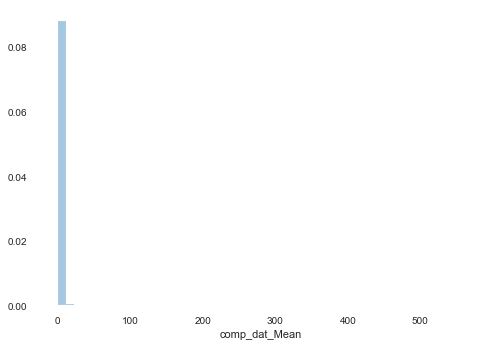

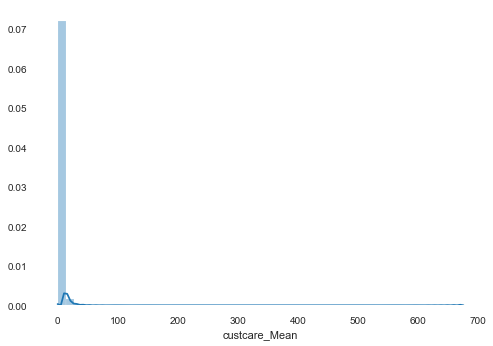

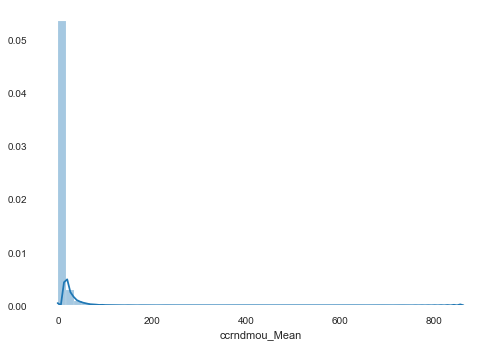

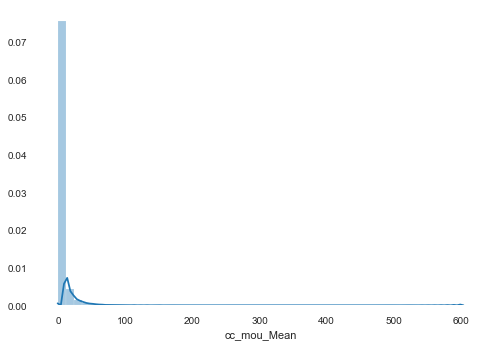

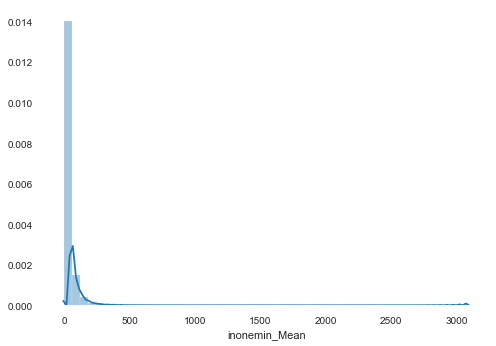

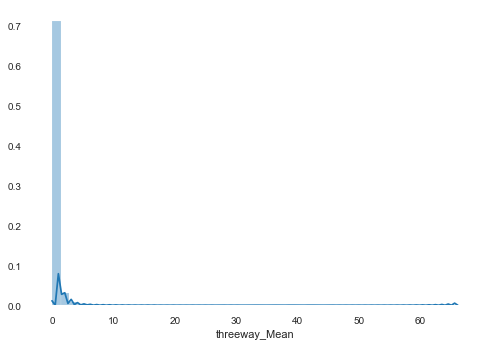

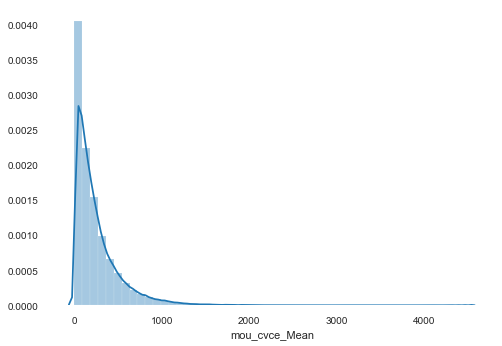

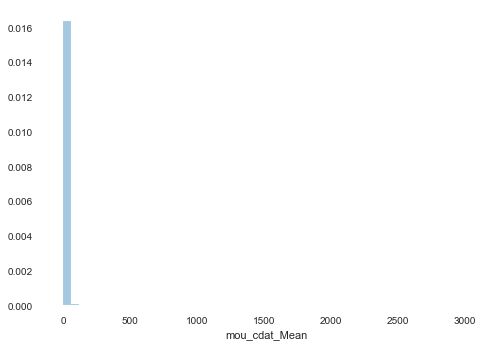

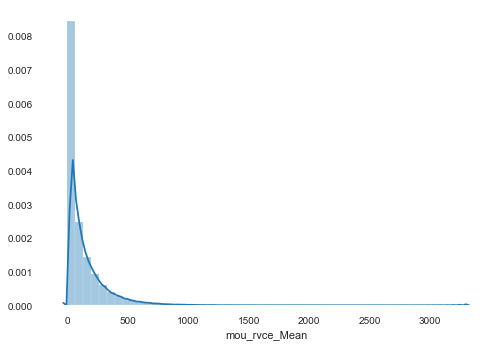

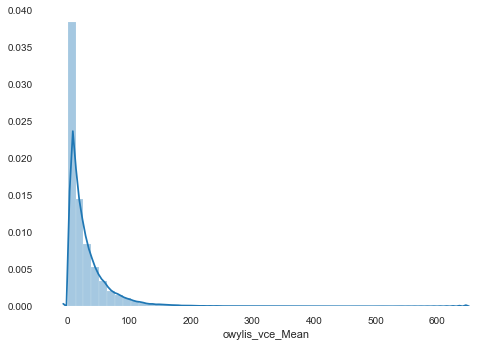

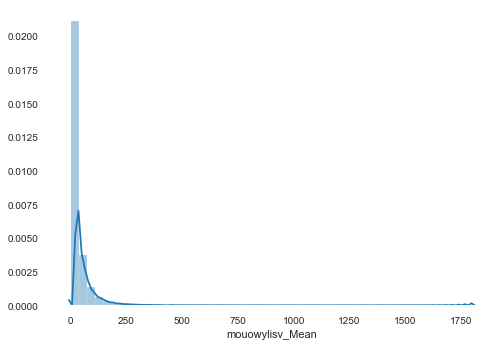

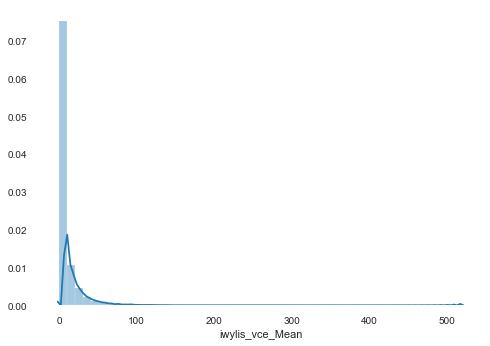

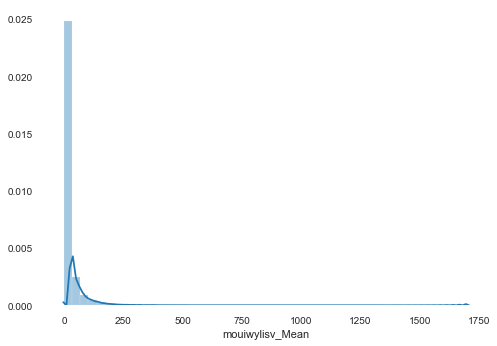

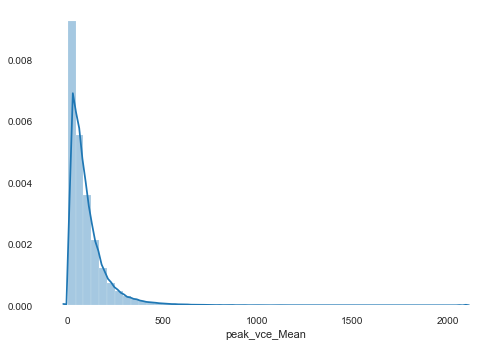

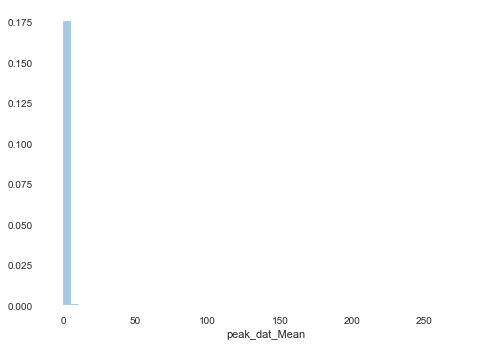

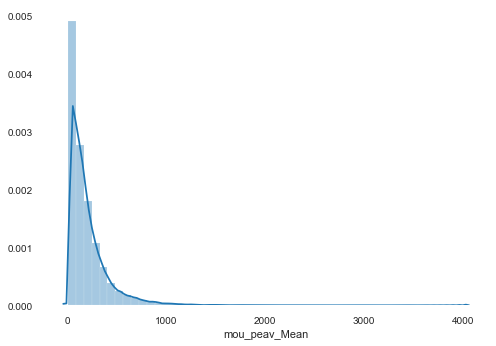

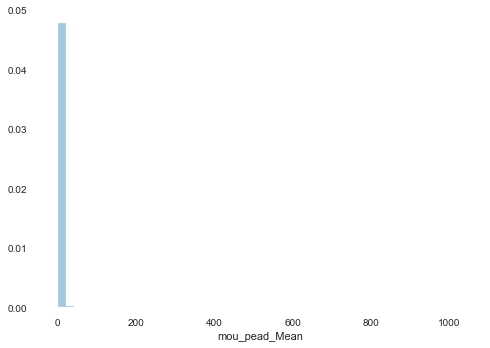

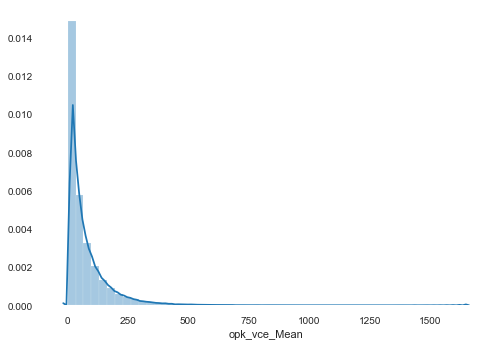

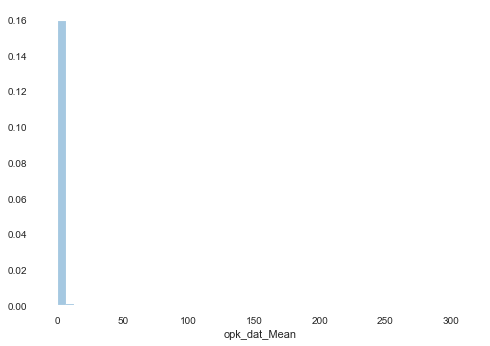

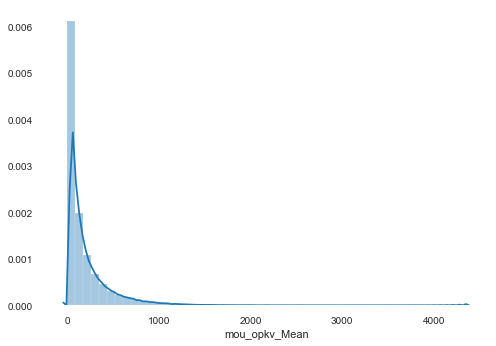

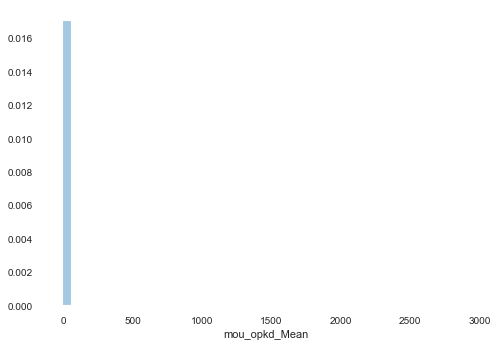

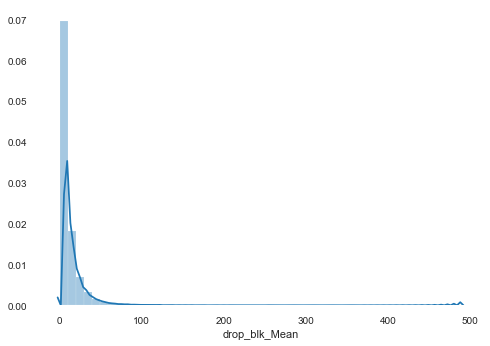

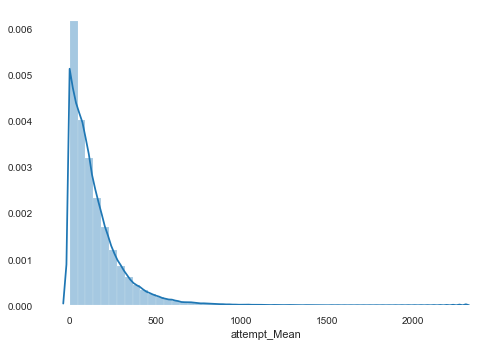

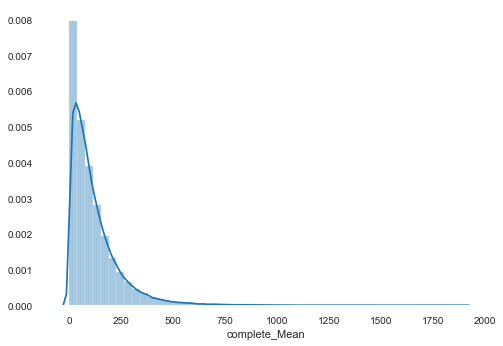

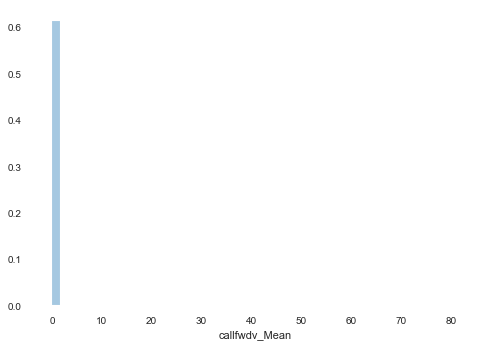

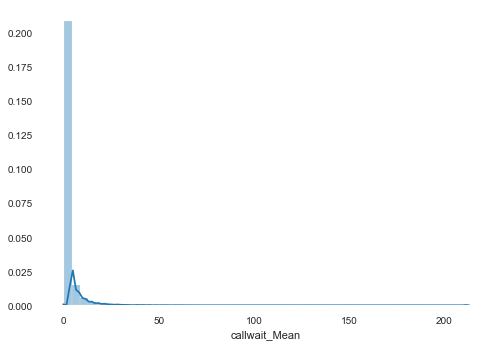

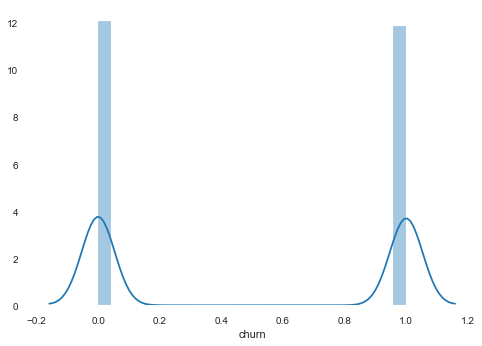

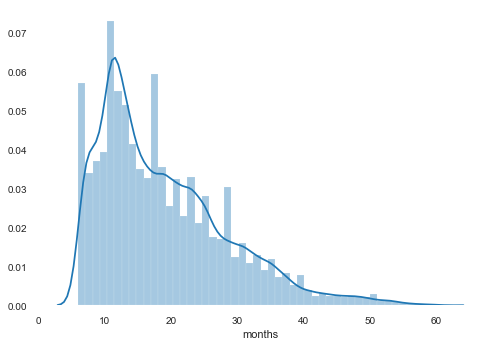

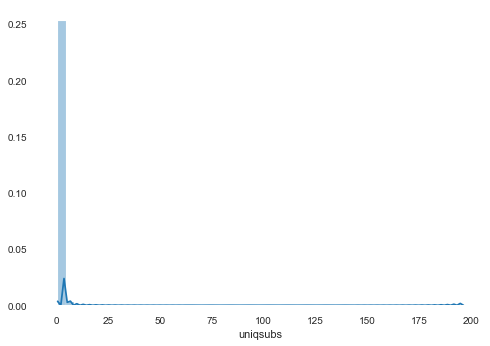

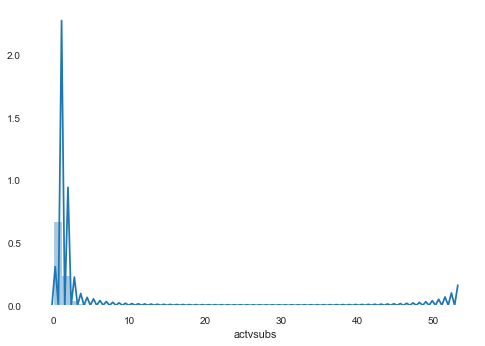

<Figure size 576x396 with 0 Axes>

In [15]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(num_df[col])

### Summary

1. Since 50% customer stayed and other 50% churned its a balanced dataset
2. These columns need to be deleted due to high missing rate: numbcars, dwllsize, HHstatin, ownrent, dwlltype, lor
3. Features with less than 3% missing values will have their missing rows be deleted
4. Highly skwed columns with zeros to be deleted
5. Churn is not linearly correlated to any other feature
6. Outliers to be removed for almost all numerical features
7. Customer ID is a unique feature that doesn't relate to churn rate, hence can be dropped
8. In numcars NaN means 0 cars


Decision to be taken for missing values in range of 7% to 26%

In [18]:
cat_df = df.select_dtypes(exclude=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
for col in cat_df.columns:
    print(col)
    print("unique Values :" ,cat_df[col].unique()) # to print categories name only
    print("Value counts of unique values :\n",cat_df[col].value_counts()) # to print count of every category
    print("-----------------------------------------------------------------------------------------")

new_cell
unique Values : ['U' 'N' 'Y']
Value counts of unique values :
 U    66914
Y    19301
N    13785
Name: new_cell, dtype: int64
-----------------------------------------------------------------------------------------
crclscod
unique Values : ['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'I' 'AA' 'J' 'U' 'Z' 'K' 'E' 'E4' 'W'
 'DA' 'Y' 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'B2' 'IF' 'Z1' 'O' 'M' 'L'
 'U1' 'Z4' 'A2' 'V' 'TP' 'EM' 'C2' 'C5' 'S' 'EC' 'Z5' 'D2' 'GY' 'ZY' 'E2'
 'A3' 'V1' 'EF' 'Z2' 'CY' 'P1' 'ZF']
Value counts of unique values :
 AA    36509
A     16996
BA    12667
CA     8334
EA     6419
B      4110
DA     3669
ZA     3493
C      1456
A2      861
E4      833
U       480
E       339
D4      301
GA      281
Z4      253
D       247
I       243
G       241
JF      194
Z       191
J       190
CY      190
C2      180
M       169
ZY      119
D5      114
B2      109
K       106
W        97
C5       81
V1       70
U1       66
EM       57
Z5       56
Y        54
EC       48
GY       34
O     